In [1]:
import numpy as np
import pandas as pd
import math
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier)
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')


print(os.listdir("D:\\data analysis\Kaggle\Titanic\input"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [2]:
path = 'D:\\data analysis\Kaggle\Titanic\input'
df_train = pd.read_csv(path + '\\' +'train.csv')
df_test = pd.read_csv(path + '\\' +'test.csv')

In [3]:
df_data = df_train.append(df_test)

PassengerId = df_test['PassengerId']
Submission = pd.DataFrame()
Submission['PassengerId'] = df_test['PassengerId']

In [4]:
print("df_train --row：", df_train.shape[0],' columns:',df_train.shape[1])
print('df_test --row:',df_test.shape[0],' columns: ',df_test.shape[1])
print('df_data --row:', df_data.shape[0],'columns',df_data.shape[1])

df_train --row： 891  columns: 12
df_test --row: 418  columns:  11
df_data --row: 1309 columns 12


In [5]:
print(df_train.columns.values)
print(df_test.columns.values)
print(df_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
['Age' 'Cabin' 'Embarked' 'Fare' 'Name' 'Parch' 'PassengerId' 'Pclass'
 'Sex' 'SibSp' 'Survived' 'Ticket']


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
pd.isnull(df_data).sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [11]:
pd.isnull(df_train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
pd.isnull(df_test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [16]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


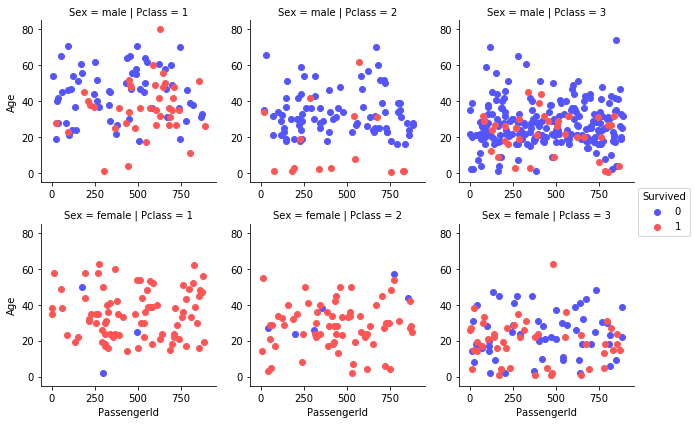

In [18]:
grid = sns.FacetGrid(df_train,col='Pclass',row='Sex',hue='Survived',palette='seismic')##pclass  指船舱等级
grid = grid.map(plt.scatter,"PassengerId","Age")
grid.add_legend()
grid

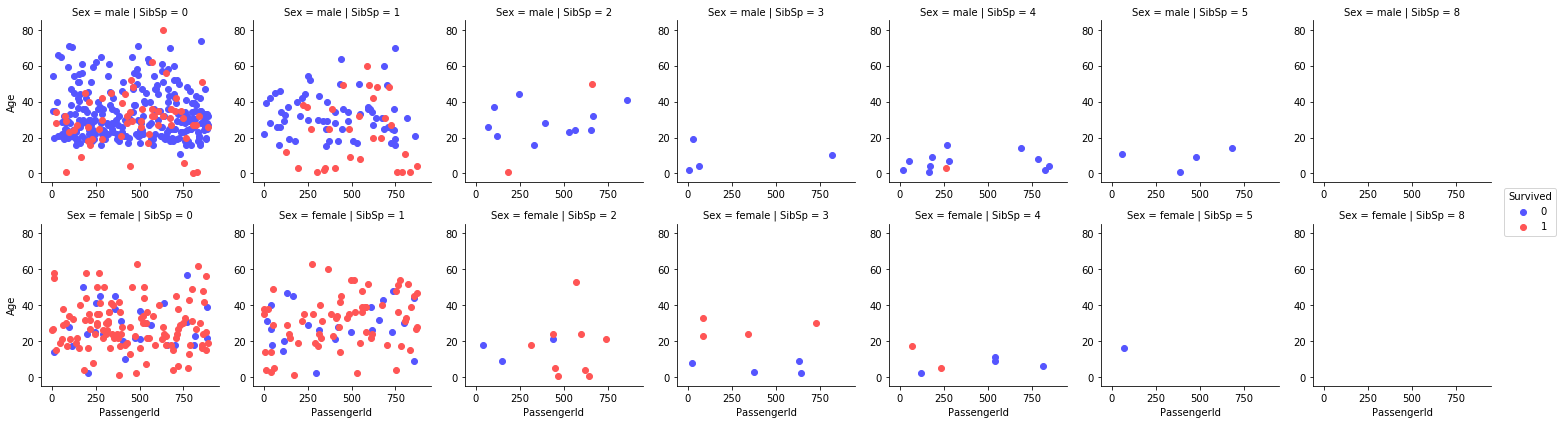

In [19]:
grid = sns.FacetGrid(df_train,col='SibSp',row='Sex',hue='Survived',palette='seismic')###sibsp 一同上船的兄弟姐妹
grid = grid.map(plt.scatter,"PassengerId","Age")
grid.add_legend()
grid

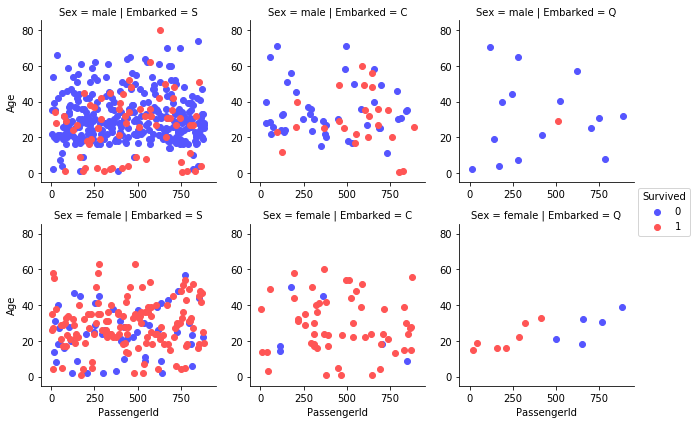

In [20]:
grid = sns.FacetGrid(df_train,col='Embarked',row='Sex',hue='Survived',palette='seismic')
grid = grid.map(plt.scatter,"PassengerId","Age")
grid.add_legend()
grid

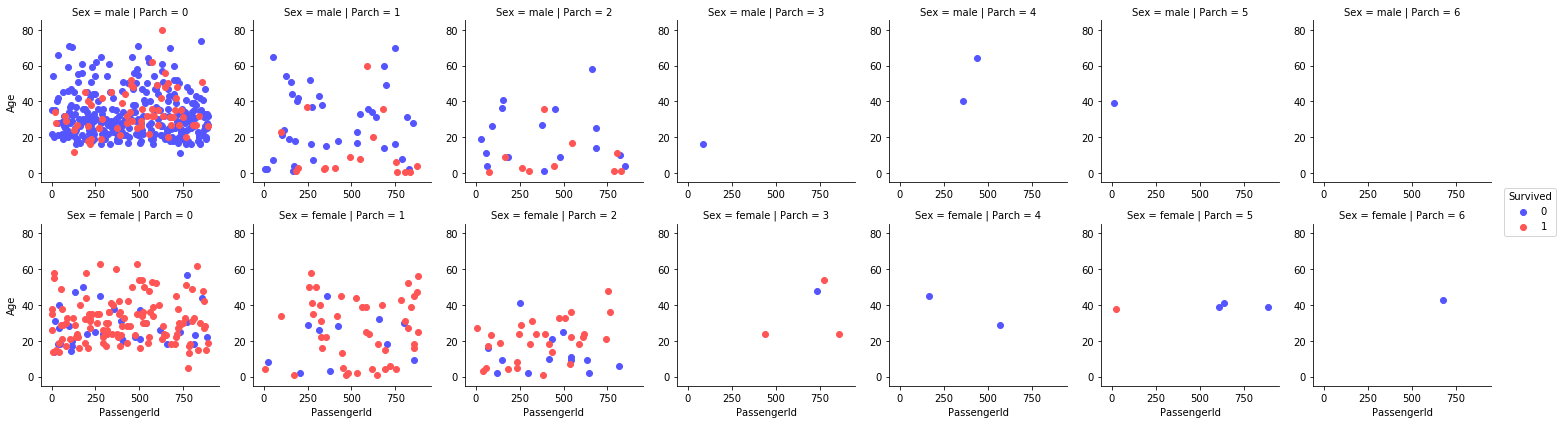

In [21]:
grid = sns.FacetGrid(df_train,col='Parch',row='Sex',hue='Survived',palette='seismic')###parch  烘干，烤干
grid = grid.map(plt.scatter,"PassengerId","Age")
grid.add_legend()
grid

In [22]:
g = sns.pairplot(df_train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked']], hue='Survived', palette = 'seismic',size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50 ))
g.set(xticklabels=[])

In [23]:
Numeric_columns= ['Pclass','Age','SibSp','Parch','Fare'] 
test = df_test[Numeric_columns].fillna(-1000)
data_to_train = df_train[Numeric_columns].fillna(-1000)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(data_to_train, y, test_size=0.3,random_state=21, stratify=y)

clf = SVC()
clf.fit(X_train,y_train)
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.6791044776119403


In [24]:
Submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [25]:
Submission['Survived'] = clf.predict(test)
print(Submission.head())
print('Prediction generated')

   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         0
4          896         0
Prediction generated


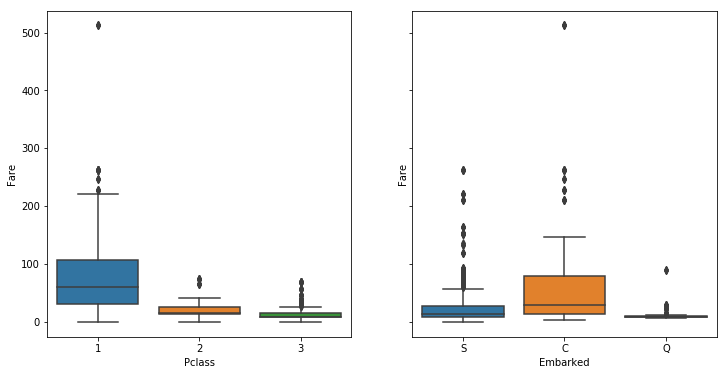

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(12,6))
sns.boxplot(data = df_data, x = "Pclass", y = "Fare",ax=ax1)
plt.figure(1)
sns.boxplot(data = df_data, x = "Embarked", y = "Fare",ax=ax2)
plt.show()

In [27]:
x = df_data.groupby('Embarked')['Fare'].median()['C']
print(x)
df_data.loc[(df_data['Fare'].isnull()) & (df_data['Embarked'] == 'C'),'Fare'] = x
print(df_data.head())

28.51875
    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            37

In [28]:
##fill the na values in Fare based on embarked data
embarked = ['S','C','Q']
for port in embarked:
    #fare_to_impute = df_data.groupby('Embarked')['Fare'].median()[embarked.index(port)]##前面的median 会求出 关于 S C Q的值，后面哪一项eembarked。index，确定过了具体的哪一个
    fare_to_impute = df_data.groupby('Embarked')['Fare'].median()['{}'.format(port)]
    df_data.loc[(df_data['Fare'].isnull()) & (df_data['Embarked'] == port), 'Fare'] = fare_to_impute
df_data.isnull().sum()
df_data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [29]:
##Fare in df_train and df_test::

df_train["Fare"] = df_data['Fare'][:891]
df_test["Fare"] = df_data['Fare'][891:]
print('Missing data estimated')

Missing data estimated


In [30]:
##fill in missing Fare value in training set based on mean fare for that Pclass
for x in range(len(df_train['Fare'])):
    if pd.isnull(df_train['Fare'][x]):
        pclass = df_train['Pclass'][x]
        df_train['Fare'][x] = round(df_train[df_train['Pclass'] == pclass]['Fare'].mean(),8)
        
##fill in missing Fare value in test set based on mean fare for thata Pclass
for x in range(len(df_test['Fare'])):
    if pd.isnull(df_test['Fare'][x]):
        pclass = df_test['Pclass'][x]
        df_test['Fare'][x] = round(df_test[df_test['Pclass'] == pclass]['Fare'].mean(),8)
#map Fare values into groups of numerical values
df_data["FareBand"] = pd.qcut(df_data['Fare'], 8, labels = [1, 2, 3, 4,5,6,7,8]).astype('int')
###qcut 切割的空间里面的 元素个数相同，cut切割的每个空间大小是一样的
df_train["FareBand"] = pd.qcut(df_train['Fare'], 8, labels = [1, 2, 3, 4,5,6,7,8]).astype('int')
df_test["FareBand"] = pd.qcut(df_test['Fare'], 8, labels = [1, 2, 3, 4,5,6,7,8]).astype('int')
df_train[["FareBand", "Survived"]].groupby(["FareBand"], as_index=False).mean()
print('FareBand feature created')

FareBand feature created


In [31]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,4


In [32]:
##对于sex 这种特征进行 one hot 化
sex = pd.get_dummies(df_train[['Sex']],prefix_sep='_')
df_train = pd.concat([df_train,sex],axis=1)
testsex = pd.get_dummies(df_test[['Sex']],prefix_sep='_')
df_test = pd.concat([df_test,testsex],axis=1)
print("Gender Feature added")

Gender Feature added


In [33]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FareBand         0
Sex_female       0
Sex_male         0
dtype: int64

In [34]:

gender_mapping = {"female":0,
                   "male":1}
print(df_data["Sex"].head())
df_data['Sex'] = df_data['Sex'].map(gender_mapping)
print(df_data['Sex'])
#df_data['Sex'] = df_data['Sex'].astype('int')


0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
388    1
389    1
390    1
391    0
392    1
393    1
394    1
395    0
396    1
397    0
398    1
399    1
400    0
401    1
402    0
403    1
404    1
405    1
406    1
407    1
408    0
409    0
410    0
411    0
412    0
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: int64


In [35]:
#Family_Survival in Train and Test_Df
df_train['Sex'] = df_data['Sex'][:891]
df_test['Sex'] = df_data['Sex'][891:]
print('Gender Category created')

Gender Category created


In [36]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FareBand         0
Sex_female       0
Sex_male         0
dtype: int64

In [37]:
# Name Length
df_data['NameLen'] = df_data['Name'].apply(lambda x:len(x))
print('Name Length calculated')

#split to test and training
df_train['NameLen'] = df_data['NameLen'][:891]
df_test['NameLen'] = df_data['NameLen'][891:]

df_train['NameBand'] = pd.cut(df_train['NameLen'],bins=5,labels=[1,2,3,4,5])
df_test['NameBand'] = pd.cut(df_test['NameLen'],bins=5,labels=[1,2,3,4,5])


Name Length calculated


In [38]:

df_test.head()
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FareBand         0
Sex_female       0
Sex_male         0
NameLen          0
NameBand         0
dtype: int64

In [39]:
##
print(df_train['NameLen'].head())
print(df_train['NameBand'].head())


0    23
1    51
2    22
3    44
4    24
Name: NameLen, dtype: int64
0    1
1    3
2    1
3    3
4    1
Name: NameBand, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [40]:
#convert AgeGroup categories into Columns

dummies = pd.get_dummies(df_train[['NameBand']].astype('category'),prefix_sep='_')
df_train = pd.concat([df_train,dummies],axis= 1)
dummies = pd.get_dummies(df_test[['NameBand']].astype('category'),prefix_sep='_')
df_test = pd.concat([df_test,dummies],axis=1)
print("Name Length categories created")


Name Length categories created


In [41]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FareBand         0
Sex_female       0
Sex_male         0
NameLen          0
NameBand         0
NameBand_1       0
NameBand_2       0
NameBand_3       0
NameBand_4       0
NameBand_5       0
dtype: int64

In [42]:
#get Title
df_data['Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.',expand=False) 

#Unify common titles
df_data['Title'] = df_data['Title'].replace('Mlle','Miss')
df_data['Title'] = df_data['Title'].replace('Master','Master')
df_data['Title'] = df_data['Title'].replace(['Mme','Dona','Ms'],'Mrs')
df_data["Title"] = df_data["Title"].replace(['Jonkheer','Don'],'Mr')
df_data["Title"] = df_data["Title"].replace(['Capt','Major', 'Col','Rev','Dr'], 'Millitary')
df_data["Title"] = df_data["Title"].replace(['Lady', 'Countess','Sir'], 'Honor')

##Age in df_train and df_test
df_train['Title'] = df_data['Title'][:891]
df_test['Title'] = df_data['Title'][891:]

##convert Title categories to Columns
titledummies = pd.get_dummies(df_train[['Title']],prefix_sep='_')
df_train = pd.concat([df_train,titledummies],axis=1)
titledummies = pd.get_dummies(df_test[['Title']],prefix_sep="_")
df_test = pd.concat([df_test,titledummies],axis=1)
print('title categories added')


title categories added


In [43]:
##Mapping Titles

In [44]:
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Millitary":5,"Honor":6}
print(df_train.head())
df_data['Title'].isnull().sum()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare    ...     NameBand_3 NameBand_4  NameBand_5  \
0         A/5 21171   7.2500    ...              0          0           0   
1          PC 17599  71.2833    ...              1          0           0   
2  STON/O2. 3101282   7.9250    ...              0          0    

0

In [45]:
df_data["TitleCat"] = df_data['Title'].map(title_mapping)
print(df_data.head())
df_data['TitleCat'].isnull().sum()

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket  FareBand  NameLen Title  \
0       3    1      1       0.0         A/5 21171         1       23    Mr   
1       1    0      1       1.0          PC 17599         8       51   Mrs   
2       3    0      0       1.0  STON/O2. 3101282         3       22  Miss   
3       1    0      

0

In [46]:
df_data['TitleCat'].isnull().sum()

0

In [47]:
df_data['TitleCat'][df_data['TitleCat'].isnull().values == True]


Series([], Name: TitleCat, dtype: int64)

In [48]:

df_data['Title'][641]

'Miss'

In [49]:
#df_data["TitleCat"] = df_data["TitleCat"].astype(int)
df_train["TitleCat"] = df_data["TitleCat"][:891]


df_test["TitleCat"] = df_data["TitleCat"][891:]
print('Title Category created')


Title Category created


In [50]:
df_train['TitleCat'].isnull().sum()
df_test['TitleCat'].isnull().sum()

0

In [51]:
df_train['TitleCat'][df_train['TitleCat'].isnull().values==True]

Series([], Name: TitleCat, dtype: int64)

In [52]:
df_train['Title'][556]

'Honor'

In [53]:
titles = ['Master','Miss','Mr','Mrs','Millitary','Honor']
for title in titles:
    age_to_impute = df_data.groupby('Title')['Age'].median()[title]
    df_data.loc[(df_data['Age'].isnull()) & (df_data['Title'] == title),'Age'] = age_to_impute

#Age in df_train AND df_test
df_train['Age'] = df_data['Age'][:891]
df_test['Age'] = df_data['Age'][891:]

print('Missing Ages Estimated')

Missing Ages Estimated


In [54]:
##Create AgeBands
bins = [0,12,24,45,60,np.inf]
labels = ['Child','Young Adult','Adult','Older Adult','Senior']
df_train['AgeBand'] = pd.cut(df_train['Age'],bins,labels=labels)
df_test['AgeBand'] = pd.cut(df_test['Age'],bins,labels=labels)
print('Age Feature created')


Age Feature created


In [55]:
##convert AgeGrop cateories to Columns
dummies = pd.get_dummies(df_train[['AgeBand']],prefix_sep='_')
df_train = pd.concat([df_train,dummies],axis=1)
dummies = pd.get_dummies(df_test[['AgeBand']],prefix_sep='_')
df_test = pd.concat([df_test,dummies],axis=1)
print('AgeBand Feature Created')

AgeBand Feature Created


In [56]:
df_test.isnull().sum()

PassengerId              0
Pclass                   0
Name                     0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  327
Embarked                 0
FareBand                 0
Sex_female               0
Sex_male                 0
NameLen                  0
NameBand                 0
NameBand_1               0
NameBand_2               0
NameBand_3               0
NameBand_4               0
NameBand_5               0
Title                    0
Title_Master             0
Title_Millitary          0
Title_Miss               0
Title_Mr                 0
Title_Mrs                0
TitleCat                 0
AgeBand                  0
AgeBand_Child            0
AgeBand_Young Adult      0
AgeBand_Adult            0
AgeBand_Older Adult      0
AgeBand_Senior           0
dtype: int64

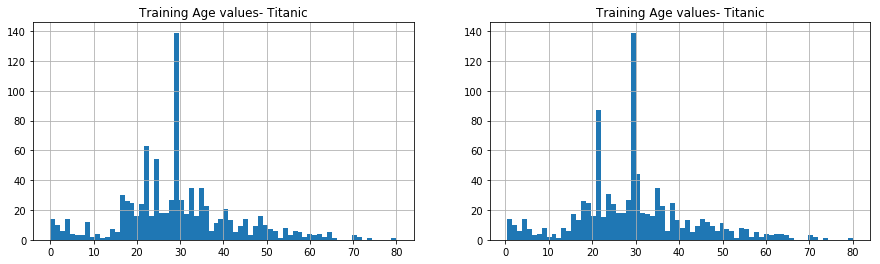

In [57]:
##Visualise Age DaTa
fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Training Age values- Titanic')
axis2.set_title('Training Age values- Titanic')

#plot original Age values
df_train['Age'].dropna().astype(int).hist(bins =70,ax=axis1)

#plot new Age values
df_train['Age'].hist(bins=70,ax =axis2)


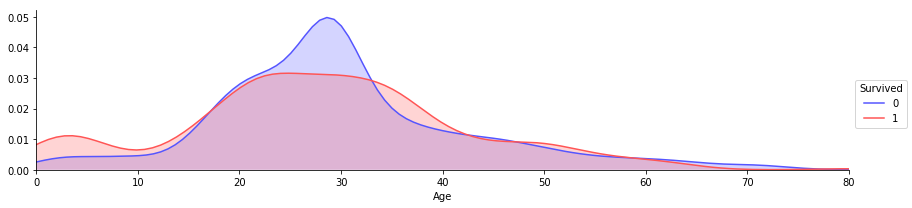

In [58]:
##peaks for survived /not survived passengers by their age
facet = sns.FacetGrid(df_train,hue="Survived",palette='seismic',aspect=4)
facet.map(sns.kdeplot,'Age',shade =True)
facet.set(xlim= (0,df_train['Age'].max()))
facet.add_legend()

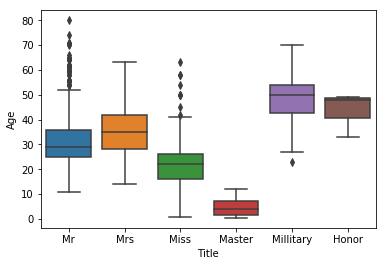

In [59]:
sns.boxplot(data=df_train,x = 'Title',y= 'Age')

In [60]:
#LoneTeavellers Feature
df_train['Alone'] = np.where(df_train['SibSp'] + df_train['Parch'] + 1 == 1, 1,0)
df_test['Alone'] = np.where(df_test['SibSp'] + df_test['Parch'] + 1 == 1, 1, 0)

print('lone traveller feature created')

lone traveller feature created


In [61]:
df_data['Mother'] = (df_data['Title'] == 'Mrs') & (df_data['Parch'] > 0)
df_data['Mother'] = (df_data['Mother'].astype(int))

df_train['Mother'] = df_data['Mother'][:891]
df_test['Mother'] = df_data['Mother'][891:]
print('Mother Category created')

Mother Category created


In [62]:
df_train['Family Size'] = (df_train['SibSp'] + df_train['Parch'] + 1)
df_test['Family Size'] = df_test['SibSp'] + df_test['Parch'] + 1
print('Family size feature created')

Family size feature created


In [63]:
##get last name
df_data['Last_Name'] = df_data['Name'].apply(lambda  x :str.split(x,',')[0])
##set survival_Value 
DEFAULT_SURVIVAL_VALUE = 0.5
df_data['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

##Find family Group by Fare
for grp,grp_df in df_data[['Survived','Name','Last_Name','Fare','Ticket','PassengerId','SibSp','Parch','Age','Cabin']].groupby(['Last_Name','Fare']):
    if(len(grp_df) != 1):
        
        #Family group is found
        for ind,row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if(smax == 1.0):
                df_data.loc[df_data['PassengerId'] == passID,'Family_Survival'] =1
            if(smin == 0.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Family_Survival'] = 0
            
print('Number of passenger with family survival information:',df_data.loc[df_data['Family_Survival'] != 0.5].shape[0])


Number of passenger with family survival information: 420


In [64]:
##Find Family groups by Ticket
for _,grp_df in df_data.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if(row['Family_Survival'] == 0) | (row['Family_Survival'] == 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    df_data.loc[df_data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    df_data.loc[df_data['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(df_data[df_data['Family_Survival']!=0.5].shape[0]))


Number of passenger with family/group survival information: 546


In [65]:
df_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FareBand,NameLen,Title,TitleCat,Mother,Last_Name,Family_Survival
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,1,23,Mr,1,0,Braund,0.5
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,8,51,Mrs,3,0,Cumings,0.5
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,3,22,Miss,2,0,Heikkinen,0.5
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,7,44,Mrs,3,0,Futrelle,0.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,3,24,Mr,1,0,Allen,0.5


In [66]:
##Family_Survival in df_train and df_test
df_train['Family_Survival'] = df_data['Family_Survival'][:891]
df_test['Family_Survival'] = df_data['Family_Survival'][891:]

In [67]:
##check if cabin inf exists
df_data['HadCabin'] = (df_data['Cabin'].notnull().astype('int'))
##split Embarked into df_train and df_test
df_train['HadCabin'] = df_data['HadCabin'][:891]
df_test['HadCabin'] = df_data['HadCabin'][891:]
print('Cabin feature created')

Cabin feature created


In [68]:
##Extract Deck##Deck 甲板
df_data['Deck'] = df_data.Cabin.str.extract('([A-Za-z])',expand=False)##([A-Za-z]) 从A到Z，从a到z 不分大小写


In [69]:
df_data['Deck'].head()
df_data['Cabin'].head()


0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [70]:
df_data['Deck'] = df_data['Deck'].fillna('N')

In [71]:
#Map Deck
deck_mapping = {'N':0,'A':1,'B':2,'C':3,'D':4,'E':5}
df_data['Deck'] = df_data['Deck'].map(deck_mapping)
##and split to training and test
df_train['Deck'] = df_data['Deck'][:891]
df_test['Deck'] = df_data['Deck'][891:]
print('Deck feature created')

Deck feature created


In [72]:
df_train['Deck'].isnull().sum()
df_data['Deck'].isnull().sum()

27

In [73]:
##Map and Create Deck feature for training
df_data["Deck"] = df_data.Cabin.str.extract('([A-Za-z])', expand=False)
deck_mapping = {"0":0,"A": 1, "B": 2, "C": 3, "D": 4, "E": 5}
df_data['Deck'] = df_data['Deck'].map(deck_mapping)
df_data["Deck"] = df_data["Deck"].fillna("0")
df_data["Deck"]=df_data["Deck"].astype('int')

df_train["Deck"] = df_data['Deck'][:891]
df_test["Deck"] = df_data['Deck'][891:]
print('Deck feature created')

Deck feature created


In [74]:
df_data['Deck'].isnull().sum()

0

In [75]:
df_train['Deck'].isnull().sum()

0

In [76]:
##convert categories to Columns
dummies=pd.get_dummies(df_train['Deck'].astype('category'), prefix='Deck_')

In [77]:
dummies

,Deck__0,Deck__1,Deck__2,Deck__3,Deck__4,Deck__5
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,0,0,0,0,0,1
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


In [78]:
df_train = pd.concat([df_train, dummies], axis=1) 
dummies=pd.get_dummies(df_test.Deck, prefix='Deck_') 

In [79]:

df_test = pd.concat([df_test,dummies], axis=1)
print('Deck Categories created')


Deck Categories created


In [80]:
###Treat Ticket by extracting the ticket prefix hwen there is no prefix it returnx


Ticket = []
for i in list(df_data.Ticket):
    if not i.isdigit():
        Ticket.append(i.replace('.',',').replace('/','').strip().split(' ')[0])
    else:
        Ticket.append('X')

df_data['Ticket'] = Ticket
df_data['Ticket'].head()

df_train['Ticket'] = df_data['Ticket'][:891]
df_test['Ticket'] = df_data['Ticket'][891:]
print('Ticket feature created')

Ticket feature created


In [81]:
##ticket prefix

df_data['TicketRef'] = df_data['Ticket'].apply(lambda  x:str(x)[0])
df_data['TicketRef'].value_counts()

#split to train and test
df_train['TicketRef'] = df_data['TicketRef'][:891]
df_test['TicketRef'] = df_data['TicketRef'][891:]

In [82]:
df_train['TicketRef'].astype('category').head()

0    A
1    P
2    S
3    X
4    X
Name: TicketRef, dtype: category
Categories (8, object): [A, C, F, L, P, S, W, X]

In [83]:
##convet Agegroup categories to Columns
dummies = pd.get_dummies(df_train.TicketRef,prefix='TicketRef_')
df_train = pd.concat([df_train,dummies],axis=1)
dummies = pd.get_dummies(df_test.TicketRef,prefix='TicketRef_')
df_test = pd.concat([df_test,dummies],axis=1)
print('TicketBand categories created')

TicketBand categories created


In [84]:
df_train['Pclass'].head()


0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [85]:
##convert AgeGroup categories to Columns
dummies = pd.get_dummies(df_train.Pclass,prefix='Pclass_')
df_train = pd.concat([df_train,dummies],axis= 1)
dummies = pd.get_dummies(df_test.Pclass,prefix='Pclass_')
df_test = pd.concat([df_test,dummies],axis=1)
print('Pclass categories created')

Pclass categories created


In [86]:
###create free feature base on fare =0 
df_data['Free'] = np.where(df_data['Fare'] == 0,1,0)
df_data['Free'] = df_data['Free'].astype(int)

df_train['Free'] = df_data['Free'][:891]
df_test['Free'] = df_data['Free'][891:]
print('Free Category created')

Free Category created


In [87]:
#FareBand
Pclass = [1,2,3]
for aclass in Pclass:
    fare_to_impute = df_data.groupby('Pclass')['Fare'].median()[aclass]
    df_data.loc[(df_data['Fare'].isnull()) & (df_data['Pclass'] == aclass), 'Fare'] = fare_to_impute

df_train['Fare'] = df_data['Fare'][:891]
df_test['Fare'] = df_data['Fare'][891:]


In [88]:
df_data['Fare'].head()


0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [89]:
pd.qcut(df_data['Fare'],4,labels=[1,2,3,4]).head()

0    1
1    4
2    2
3    4
4    2
Name: Fare, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [90]:

##map Fare values into groups of numerical values
df_train['FareBand'] = pd.qcut(df_train['Fare'],4,labels=[1,2,3,4]).astype('category')
df_test['FareBand'] = pd.qcut(df_test['Fare'],4,labels=[1,2,3,4]).astype('category')

##convert FareBand categories to Columns
dummies = pd.get_dummies(df_train['FareBand'],prefix= 'FareBand_')
df_train = pd.concat([df_train,dummies],axis= 1)
dummies = pd.get_dummies(df_test['FareBand'],prefix='FareBand_')
df_test = pd.concat([df_test,dummies],axis=1)
print('FareBand categories created')


FareBand categories created


In [91]:
df_train['Embarked'].astype('category').head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: category
Categories (3, object): [C, Q, S]

In [92]:
#Convert Embarked categories to Columns
dummies = pd.get_dummies(df_train['Embarked'].astype('category'),prefix='Embarked_')
df_train = pd.concat([df_train,dummies],axis=1)

In [93]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass__2,Pclass__3,Free,FareBand__1,FareBand__2,FareBand__3,FareBand__4,Embarked__C,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A5,7.2500,...,0,1,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC,71.2833,...,0,0,0,0,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,"STONO2,",7.9250,...,0,1,0,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,X,53.1000,...,0,0,0,0,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,X,8.0500,...,0,1,0,0,1,0,0,0,0,1


In [94]:
dummies = pd.get_dummies(df_test['Embarked'].astype('category'),prefix='Embarked_')
df_test = pd.concat([df_test,dummies],axis=1)
print('Embarked feature created')

Embarked feature created


In [95]:
##Missing Data
##check for any other unusuable values
print(len(df_test.columns))
#df_test.head()
print(pd.isnull(df_test).sum())

66
PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              327
Embarked             0
FareBand             0
Sex_female           0
Sex_male             0
NameLen              0
NameBand             0
NameBand_1           0
NameBand_2           0
NameBand_3           0
NameBand_4           0
NameBand_5           0
Title                0
Title_Master         0
Title_Millitary      0
Title_Miss           0
Title_Mr             0
Title_Mrs            0
TitleCat             0
AgeBand              0
AgeBand_Child        0
                  ... 
Family Size          0
Family_Survival      0
HadCabin             0
Deck                 0
Deck__0              0
Deck__1              0
Deck__2              0
Deck__3              0
Deck__4              0
Deck__5              0
TicketRef            0
TicketRef__A         0
TicketRe

In [96]:
##Statistical Overview
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_female,Sex_male,...,Pclass__2,Pclass__3,Free,FareBand__1,FareBand__2,FareBand__3,FareBand__4,Embarked__C,Embarked__Q,Embarked__S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.302660,0.523008,0.381594,32.204208,0.352413,0.647587,...,0.206510,0.551066,0.016835,0.250281,0.251403,0.249158,0.249158,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,13.240228,1.102743,0.806057,49.693429,0.477990,0.477990,...,0.405028,0.497665,0.128725,0.433418,0.434063,0.432769,0.432769,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


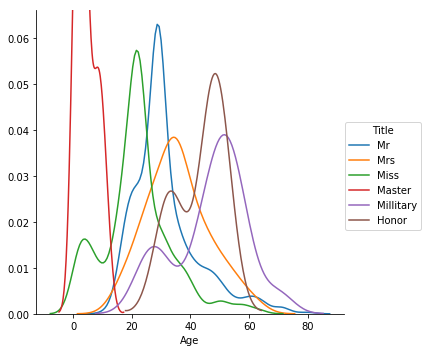

In [97]:
##Visualizing age data
#Group title
df_train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

#plot age distribution by title
facet = sns.FacetGrid(data=df_train,hue='Title',legend_out=True,size=5)
facet = facet.map(sns.kdeplot,'Age')
facet.add_legend()

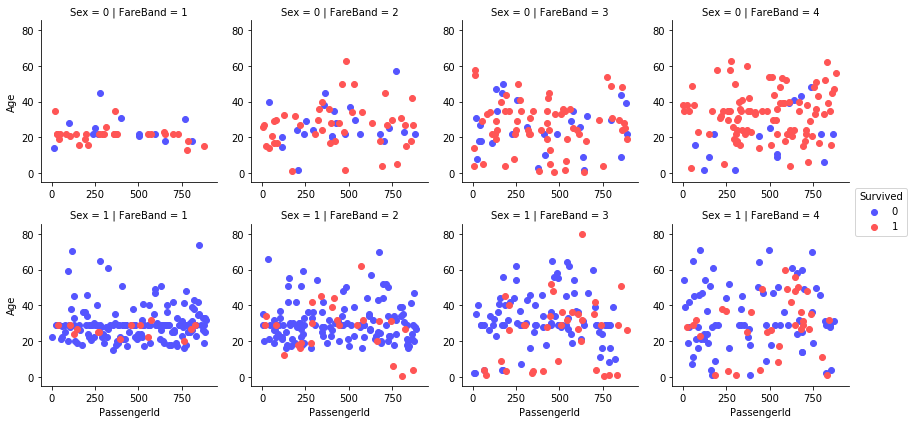

In [99]:
##Survival by FareBand and Gender
grid = sns.FacetGrid(df_train,col='FareBand',row = 'Sex',hue='Survived',palette='seismic')
grid = grid.map(plt.scatter,'PassengerId','Age')
grid.add_legend()
grid

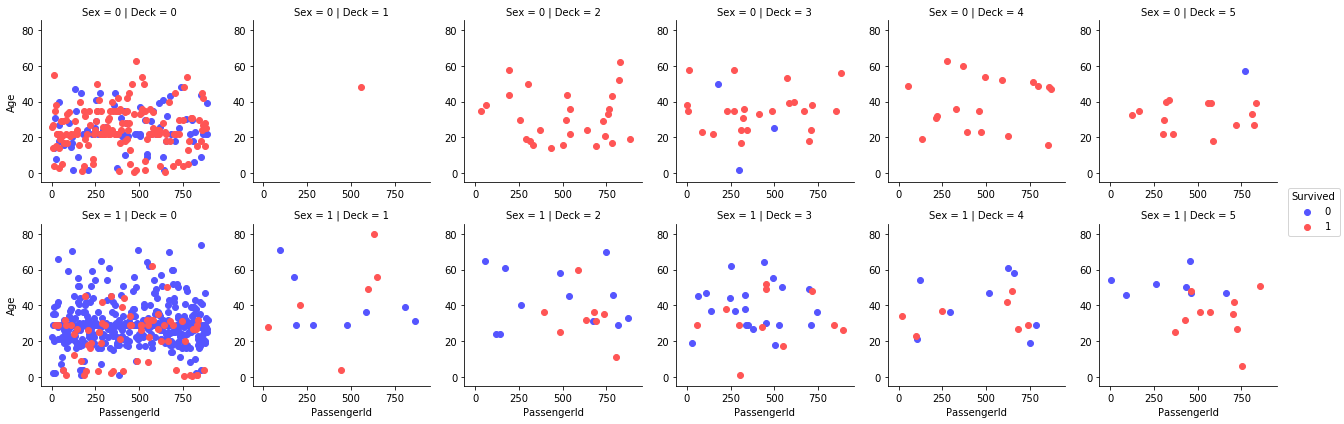

In [100]:
##Survival by Deck and Gender
grid = sns.FacetGrid(df_train,col='Deck',row='Sex',hue='Survived',palette='seismic')
grid = grid.map(plt.scatter,'PassengerId','Age')
grid.add_legend()
grid

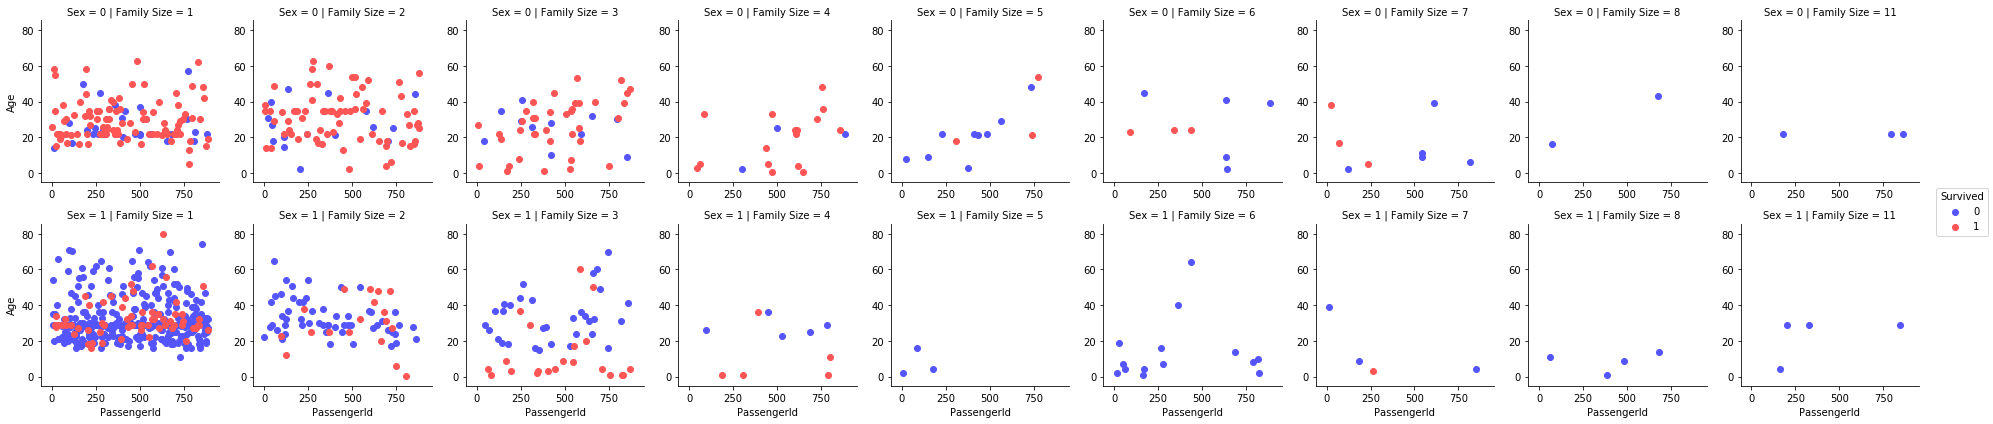

In [101]:
##Survival by Family Size and Gender
grid = sns.FacetGrid(df_train,col='Family Size',row='Sex',hue='Survived',palette='seismic')
grid = grid.map(plt.scatter,'PassengerId','Age')
grid.add_legend()
grid

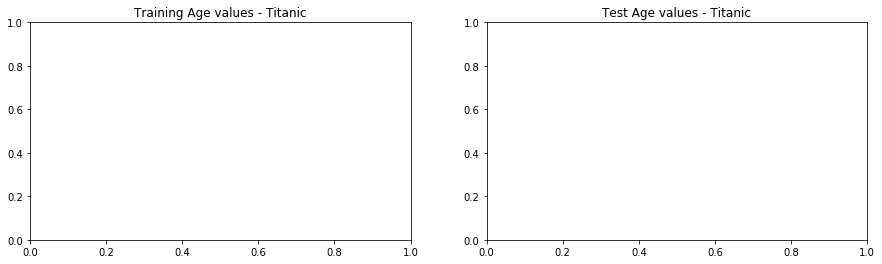

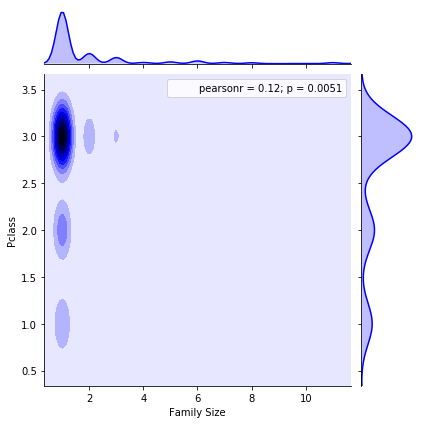

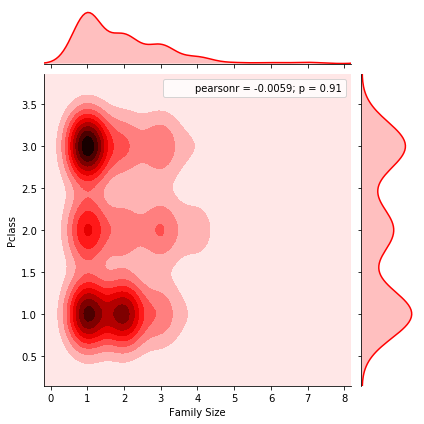

In [102]:
###Survival by passenger class and FamilySize 
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Training Age values - Titanic')
axis2.set_title('Test Age values - Titanic')

x1=df_train[df_train["Survived"]==0]
x2=df_train[df_train["Survived"]==1]

# Set up the matplotlib figure
plt.figure(1)
sns.jointplot(x="Family Size", y="Pclass", data=x1, kind="kde", color='b')
plt.figure(2)
sns.jointplot(x="Family Size", y="Pclass", data=x2, kind="kde", color='r')
plt.show()

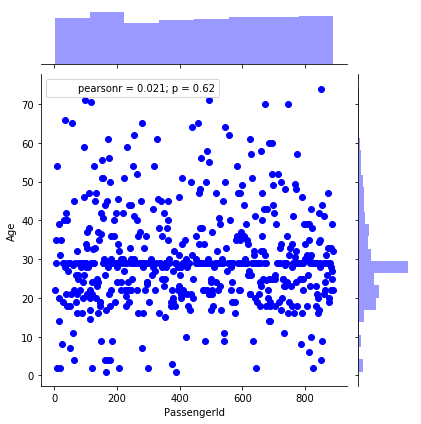

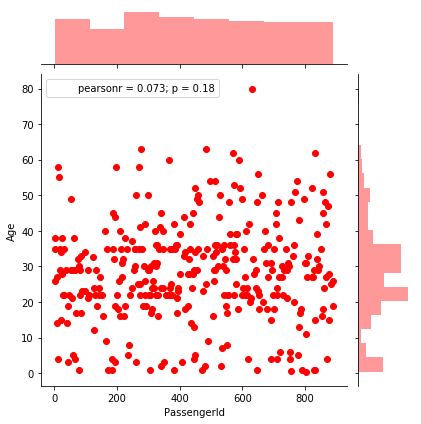

In [103]:
##Fare JoinPlot
sns.jointplot(data=x1,x='PassengerId',y='Age',kind='scatter',color='b')
plt.figure(4)
sns.jointplot(data=x2,x='PassengerId',y ='Age',kind='scatter',color='r')

In [104]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FareBand',
       'Sex_female', 'Sex_male', 'NameLen', 'NameBand', 'NameBand_1',
       'NameBand_2', 'NameBand_3', 'NameBand_4', 'NameBand_5', 'Title',
       'Title_Honor', 'Title_Master', 'Title_Millitary', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'TitleCat', 'AgeBand', 'AgeBand_Child',
       'AgeBand_Young Adult', 'AgeBand_Adult', 'AgeBand_Older Adult',
       'AgeBand_Senior', 'Alone', 'Mother', 'Family Size', 'Family_Survival',
       'HadCabin', 'Deck', 'Deck__0', 'Deck__1', 'Deck__2', 'Deck__3',
       'Deck__4', 'Deck__5', 'TicketRef', 'TicketRef__A', 'TicketRef__C',
       'TicketRef__F', 'TicketRef__L', 'TicketRef__P', 'TicketRef__S',
       'TicketRef__W', 'TicketRef__X', 'Pclass__1', 'Pclass__2', 'Pclass__3',
       'Free', 'FareBand__1', 'FareBand__2', 'FareBand__3', 'FareBand__4',
       'Embarked__C', 'Embarked__Q', 'Embarked__S'],
   

In [106]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass__2,Pclass__3,Free,FareBand__1,FareBand__2,FareBand__3,FareBand__4,Embarked__C,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A5,7.2500,...,0,1,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC,71.2833,...,0,0,0,0,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,"STONO2,",7.9250,...,0,1,0,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,X,53.1000,...,0,0,0,0,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,X,8.0500,...,0,1,0,0,1,0,0,0,0,1


In [107]:
SIMPLE_COLUMNS=['Pclass','Age','SibSp','Parch','Family_Survival','Alone','Sex_female','Sex_male','Title_Master', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Millitary','Embarked'] #84
INTERESTING_COLUMNS=['Survived','Pclass','Age','SibSp','Parch','Title','Alone','Mother','Family Size','Family_Survival','Embarked','FareBand','TicketRef']
CATEGORY_COLUMNS=['Family Size','Family_Survival','Alone','Mother','Sex_female','Sex_male','AgeBand_Child',
       'AgeBand_Young Adult', 'AgeBand_Adult', 'AgeBand_Older Adult',
       'AgeBand_Senior','Title_Master', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Millitary','NameBand_1',
       'NameBand_2', 'NameBand_3', 'NameBand_4', 'NameBand_5','Embarked__C','Embarked__Q','Embarked__S','TicketRef__A', 'TicketRef__C', 'TicketRef__F', 'TicketRef__L',
       'TicketRef__P', 'TicketRef__S', 'TicketRef__W', 'TicketRef__X','Pclass__1', 'Pclass__2', 'Pclass__3','HadCabin','Free','FareBand__1', 'FareBand__2', 'FareBand__3', 'FareBand__4']


In [108]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FareBand', 'Sex_female',
       'Sex_male', 'NameLen', 'NameBand', 'NameBand_1', 'NameBand_2',
       'NameBand_3', 'NameBand_4', 'NameBand_5', 'Title', 'Title_Master',
       'Title_Millitary', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'TitleCat',
       'AgeBand', 'AgeBand_Child', 'AgeBand_Young Adult', 'AgeBand_Adult',
       'AgeBand_Older Adult', 'AgeBand_Senior', 'Alone', 'Mother',
       'Family Size', 'Family_Survival', 'HadCabin', 'Deck', 'Deck__0',
       'Deck__1', 'Deck__2', 'Deck__3', 'Deck__4', 'Deck__5', 'TicketRef',
       'TicketRef__A', 'TicketRef__C', 'TicketRef__F', 'TicketRef__L',
       'TicketRef__P', 'TicketRef__S', 'TicketRef__W', 'TicketRef__X',
       'Pclass__1', 'Pclass__2', 'Pclass__3', 'Free', 'FareBand__1',
       'FareBand__2', 'FareBand__3', 'FareBand__4', 'Embarked__C',
       'Embarked__Q', 'Embarked__S'],
      dtype='object')

In [109]:
data_to_train.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [114]:
#create test and training data
test = df_test[CATEGORY_COLUMNS].fillna(-1000)
data_to_train = df_train[CATEGORY_COLUMNS].fillna(-1000)
X_train,X_test,y_train,y_test = train_test_split(data_to_train,df_train['Survived'],test_size=0.3,random_state=21, stratify=df_train['Survived'])

#from lightgbm import LGBMClassifier

RandomForest = RandomForestClassifier(random_state= 0)
Gradient = GradientBoostingClassifier(random_state= 0)
#LGBM = LGBMClassifier(n_estimators=10000,
      #  learning_rate=0.03,
       # num_leaves = 30,
      #  colsample_bytree=0.9497036,
      #  subsample=0.8715623,
       # max_depth=7,
      #  reg_alpha=0.041545473,
      #  reg_lambda=0.0735294,
      #  min_split_gain=0.0222415,
      #  min_child_weight=39.3259775,
       # silent=-1,
       # verbose=-1,)


In [115]:
df_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NameLen,Title,TitleCat,Mother,Last_Name,Family_Survival,HadCabin,Deck,TicketRef,Free
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,23,Mr,1,0,Braund,0.5,0,0,A,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,51,Mrs,3,0,Cumings,0.5,1,3,P,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,22,Miss,2,0,Heikkinen,0.5,0,0,S,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,44,Mrs,3,0,Futrelle,0.0,1,3,X,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,24,Mr,1,0,Allen,0.5,0,0,X,0
5,29.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,1,0,...,16,Mr,1,0,Moran,0.5,0,0,X,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,...,23,Mr,1,0,McCarthy,0.5,1,5,X,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,...,30,Master,4,0,Palsson,0.0,0,0,X,0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,0,...,49,Mrs,3,1,Johnson,1.0,0,0,X,0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,0,1,...,35,Mrs,3,0,Nasser,0.0,0,0,X,0


In [116]:
Gradient.fit(X_train,y_train)
Submission['Survived'] = Gradient.predict(test)
Submission.to_csv(r'D:\GradientBoost.csv')


In [119]:
data_to_train.to_csv(r'D:\data analysis\Data_to_train.csv')
test.to_csv(r'D:\data analysis\test.csv')

KeyError: 'Survived'

In [120]:
data_to_train['Survived']

KeyError: 'Survived'

In [1]:
RandomForest.fit(X_train, y_train)
print('Evaluation complete')
# Print the accuracy# Print  
print("Accuracy: {}".format(RandomForest.score(X_test, y_test)))


NameError: name 'RandomForest' is not defined

In [2]:
##map feature correlation
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_train[INTERESTING_COLUMNS].corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

NameError: name 'plt' is not defined

In [122]:
##Feature Importance(For randomForest)
RandomForest_checker =RandomForestClassifier()
RandomForest_checker.fit(X_train,y_train)
importance_df = pd.DataFrame(RandomForest_checker.feature_importances_,columns=['Feature_Importance'],index=X_train.columns)
importance_df.sort_values(by=['Feature_Importance'],ascending=False,inplace=True)
print(importance_df)

                     Feature_Importance
Sex_female                     0.127843
Sex_male                       0.100800
Family_Survival                0.091467
Family Size                    0.059849
HadCabin                       0.058789
Pclass__3                      0.054490
Title_Mr                       0.050669
AgeBand_Adult                  0.035855
NameBand_1                     0.027769
FareBand__4                    0.026089
FareBand__2                    0.023969
Pclass__1                      0.022754
Title_Miss                     0.022296
NameBand_2                     0.020975
AgeBand_Young Adult            0.020634
TicketRef__X                   0.020536
Pclass__2                      0.020215
Embarked__S                    0.020168
Title_Mrs                      0.018097
Alone                          0.016444
AgeBand_Child                  0.016388
FareBand__3                    0.016288
FareBand__1                    0.014756
Embarked__C                    0.013774


In [119]:
#Re-Forcast predictions based on new feature
Submission['Survived'] = RandomForest.predict(test)
print(Submission.head())
print('Submission created')

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
Submission created


In [123]:
##write fata Frame to csvfile
#Submission.set_index('PassengerId',inplace=True)
Submission.to_csv('D:\Randomforestcat01.csv',sep=',')
print('file created')

file created


In [124]:
DaTa = pd.read_csv('D:\Randomforestcat01.csv',sep=',')
print(DaTa)

     Unnamed: 0  PassengerId  Survived
0             0          892         0
1             1          893         0
2             2          894         1
3             3          895         0
4             4          896         0
5             5          897         0
6             6          898         0
7             7          899         1
8             8          900         0
9             9          901         1
10           10          902         0
11           11          903         0
12           12          904         0
13           13          905         0
14           14          906         0
15           15          907         1
16           16          908         0
17           17          909         0
18           18          910         0
19           19          911         0
20           20          912         1
21           21          913         0
22           22          914         0
23           23          915         0
24           24          

In [125]:
REVISED_NUMERIC_COLUMNS=['Pclass','Age','SibSp','Parch','Family_Survival','Alone','Title_Master', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Millitary','Embarked'] #84
SIMPLE_COLUMNS=['Pclass','Age','SibSp','Parch','Family_Survival','Alone','Sex_female','Sex_male','Title_Master', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Millitary','Embarked'] #84
INTERESTING_COLUMNS=['Survived','Pclass','Age','SibSp','Parch','Title','Alone','Mother','Family Size','Family_Survival','Embarked','FareBand','TicketRef']
CATEGORY_COLUMNS=['Pclass','SibSp','Parch','Family Size','Family_Survival','Alone','Mother','Sex_female','Sex_male','AgeBand_Child',
       'AgeBand_Young Adult', 'AgeBand_Adult', 'AgeBand_Older Adult',
       'AgeBand_Senior','Title_Master', 'Title_Miss','Title_Mr', 'Title_Mrs', 'Title_Millitary','NameBand_1',
       'NameBand_2', 'NameBand_3', 'NameBand_4', 'NameBand_5','Embarked__C','Embarked__Q','Embarked__S','TicketRef__A', 'TicketRef__C', 'TicketRef__F', 'TicketRef__L',
       'TicketRef__P', 'TicketRef__S', 'TicketRef__W', 'TicketRef__X','HadCabin','Free'] 

In [126]:
CATEGORY_COLUMNS

['Pclass',
 'SibSp',
 'Parch',
 'Family Size',
 'Family_Survival',
 'Alone',
 'Mother',
 'Sex_female',
 'Sex_male',
 'AgeBand_Child',
 'AgeBand_Young Adult',
 'AgeBand_Adult',
 'AgeBand_Older Adult',
 'AgeBand_Senior',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Millitary',
 'NameBand_1',
 'NameBand_2',
 'NameBand_3',
 'NameBand_4',
 'NameBand_5',
 'Embarked__C',
 'Embarked__Q',
 'Embarked__S',
 'TicketRef__A',
 'TicketRef__C',
 'TicketRef__F',
 'TicketRef__L',
 'TicketRef__P',
 'TicketRef__S',
 'TicketRef__W',
 'TicketRef__X',
 'HadCabin',
 'Free']

In [127]:
#print(df_test.columns)
# create test and training data
data_to_train = df_train[CATEGORY_COLUMNS].fillna(-1000)
prediction = df_train["Survived"]
test = df_test[CATEGORY_COLUMNS].fillna(-1000)
X_train, X_val, y_train, y_val = train_test_split(data_to_train, prediction, test_size = 0.3,random_state=21, stratify=y)
print('Data split')

Data split


In [128]:
X_train.describe()

,Pclass,SibSp,Parch,Family Size,Family_Survival,Alone,Mother,Sex_female,Sex_male,AgeBand_Child,...,TicketRef__A,TicketRef__C,TicketRef__F,TicketRef__L,TicketRef__P,TicketRef__S,TicketRef__W,TicketRef__X,HadCabin,Free
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,...,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,2.296950,0.489567,0.369181,1.858748,0.520064,0.600321,0.067416,0.361156,0.638844,0.078652,...,0.030498,0.052970,0.009631,0.004815,0.070626,0.073836,0.009631,0.747994,0.227929,0.016051
std,0.835376,1.046877,0.747007,1.528702,0.319513,0.490226,0.250942,0.480722,0.480722,0.269411,...,0.172090,0.224153,0.097741,0.069281,0.256405,0.261714,0.097741,0.434514,0.419834,0.125774
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,2.000000,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,8.000000,6.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
##Adaboost
adaboost=AdaBoostClassifier()
adaboost.fit(X_train,y_train)
y_pred = adaboost.predict(X_val)
acc_adaboost = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_adaboost)


83.21


In [130]:
###Bagging
from sklearn.cross_validation import KFold
from sklearn.ensemble import (AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,VotingClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, LogisticRegression, PassiveAggressiveClassifier,RidgeClassifierCV
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,mean_squared_error, precision_score, recall_score,roc_curve
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate,train_test_split,GridSearchCV,KFold,learning_curve,RandomizedSearchCV,StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn import ensemble, linear_model,neighbors, svm, tree

from scipy.stats import randint

bagging=BaggingClassifier()
bagging.fit(X_train,y_train)
y_pred=bagging.predict(X_val)
acc_bagging = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_bagging)

83.58


In [131]:
##Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)
y_pred = decisiontree.predict(X_val)
acc_decisiontree = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_decisiontree)

82.84


In [132]:
#Extra Trees
et = ExtraTreesClassifier()
et.fit(X_train,y_train)
y_pred = et.predict(X_val)
acc_et = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_et)

84.7


In [133]:
##Gaussian naivebayes
##Gaussian Naive bayes
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_val)
acc_gaussain = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gaussain)

81.34


In [134]:
##Gradient Boosting
gbk = GradientBoostingClassifier()
gbk.fit(X_train,y_train)
y_pred = gbk.predict(X_val)
Submission['Survived']=y_pred
Submission['Survived'].head()


ValueError: Length of values does not match length of index

In [ ]:

acc_gbk = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gbk)


ValueError: Length of values does not match length of index

In [132]:
##K Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)
acc_knn = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_knn)


83.21


In [133]:
#Linear Discriminant Analysis
linear_da = LinearDiscriminantAnalysis()
linear_da.fit(X_train,y_train)
y_pred = linear_da.predict(X_val)
acc_linear_da = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_linear_da)

84.7


In [134]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)
y_pred = linear_svc.predict(X_val)
acc_linear_svc = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_linear_svc)

84.33


In [135]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_val)
acc_logreg = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_logreg)

83.96


In [136]:
#MLP
MLP = MLPClassifier()
MLP.fit(X_train,y_train)
y_pred = MLP.predict(X_val)
acc_MLP = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_MLP)

84.33


In [137]:
#Passive Aggressive
passiveaggressive = PassiveAggressiveClassifier()
passiveaggressive.fit(X_train,y_train)
y_pred = passiveaggressive.predict(X_val)
acc_passiveaggressive = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_passiveaggressive)

83.21


In [138]:
##Perception
perception = Perceptron()
perception.fit(X_train,y_train)
y_pred = perception.predict(X_val)
acc_perceptoion = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_perceptoion)

76.87


In [139]:
##Random Forest
randomforest = RandomForestClassifier(random_state=0)
randomforest.fit(X_train,y_train)
y_pred = randomforest.predict(X_val)
acc_randomforest = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_randomforest)

84.7


In [140]:
##Ridge classifier
ridge = RidgeClassifierCV()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_val)
acc_ridge = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_ridge)

83.58


In [141]:
###Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_val)
acc_sgd = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_sgd)

72.76


In [142]:
##Suport Vector Machine
##instanciate model
clf = SVC()
##fit model
clf.fit(X_train,y_train)
##predict result
y_pred = clf.predict(X_val)
##check accuracy
acc_clf = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_clf)

83.96


SyntaxError: invalid syntax (<ipython-input-143-b812af2a111f>, line 1)

In [145]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Ridge Classifier',
              'Random Forest', 'Naive Bayes', 'Linear SVC', 'MLP','AdaBoost','Linear discriminant','Passive Aggressive',
              'Decision Tree', 'Gradient Boosting Classifier','Extra Trees','Stochastic Gradient Descent','Perceptron'],
    'Score': [acc_clf, acc_knn, acc_logreg,acc_ridge,acc_randomforest, acc_gaussain,acc_linear_svc, acc_MLP,acc_adaboost,acc_linear_da,acc_passiveaggressive,acc_decisiontree,acc_gbk,acc_et,acc_sgd,acc_perceptoion]})

models.sort_values(by='Score', ascending=False)

,Model,Score
12,Gradient Boosting Classifier,85.45
4,Random Forest,84.70
9,Linear discriminant,84.70
6,Linear SVC,84.33
7,MLP,84.33
13,Extra Trees,84.33
0,Support Vector Machines,83.96
2,Logistic Regression,83.96
3,Ridge Classifier,83.58
1,KNN,83.21
